Inside Main function
Total number of tables are 9 
<class 'bs4.element.Tag'>
3
Lenth Data table :  1
Lenth Data table :  2
Lenth Data table :  3
source_names :  ['International Monetary Fund', 'World Bank', 'United Nations']
header1 : ['Rank', 'Country', 'GDP(US$MM)']
header2 :  ['Rank', 'Country', 'GDP(US$MM)']
header3 ['Rank', 'Country', 'GDP(US$MM)']
First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False
The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 
The size of previous data was - 1000 rows and the size of the new one is - 974 rows
After getting rid of outliers the new size of the data is - 923
hello


ProgrammingError: Cannot operate on a closed database.

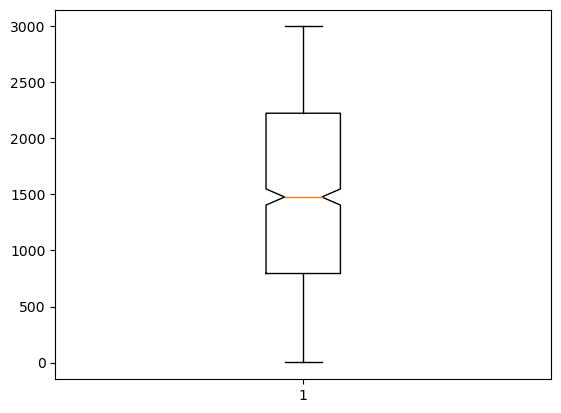

In [30]:
"""
Week 5 & 6 Exercises
"""

from __future__ import print_function
from itertools import zip_longest

import csv
import logging
import sys
import numpy as np
import pandas as pd
import random
import thinkplot
import thinkstats2
import datetime
import regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
%matplotlib inline


def Activity7_Excercise_ReadingTabularDataFromWebPage():
    # Read a HTML file (from disk) using bs4 and create a soup with bs4 and load the data to work later on it
    fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r")
    soup = BeautifulSoup(fd)
    
    # Task 2 How many tables are there?
    all_tables = soup.find_all("table")
    print("Total number of tables are {} ".format(len(all_tables)))
       
    # Task 3 find the right table using the class attribute
    data_table = soup.find("table", {"class": '"wikitable"|}'})
    print(type(data_table))

    # Task 4 Let's separate the source and the actual data
    sources = data_table.tbody.findAll('tr', recursive=False)[0]
    sources_list = [td for td in sources.findAll('td')]
    print(len(sources_list))
    data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)
    data_tables = []
    for td in data:
        data_tables.append(td.findAll('table'))
        print("Lenth Data table : ", len(data_tables))

    # Task 5 Checking how to get the source names
    source_names = [source.findAll('a')[0].getText() for source in sources_list]
    print("source_names : ",source_names)

    # Task 6 Seperate the header and data for the first source
    header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
    print("header1 :", header1)
    rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]
    data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
    df1 = pd.DataFrame(data_rows1, columns=header1)
    df1.head()

    # Task 7 Do the same for the other two sources
    header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
    print("header2 : ",header2)
    rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
    data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
    df2 = pd.DataFrame(data_rows2, columns=header2)
    df2.head()
    
    # Now for the third one
    header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
    print ("header3", header3)
    rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
    data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
    df3 = pd.DataFrame(data_rows3, columns=header3)
    df3.head()
    
    ### closing the connection
    fd.close()

def Activity8_Excercise_HandlingOutliersAndMissingData():
    ### Read the visit_data.csv file and check for duplicates
    df = pd.read_csv("visit_data.csv")
    df.head()
    print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
    print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
    print("Email is duplictaed - {}".format(any(df.email.duplicated())))

    ### Check if any essential column contains NaN.

    print("The column Email contains NaN - %r " % df.email.isnull().values.any())
    print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
    print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

    ### Get rid of the outliers.
    # There are various ways to do this. This is just one way. We encourage you to explore other ways.
    # But before that we need to store the previous size of the data set and we will compare it with the new size
    size_prev = df.shape
    df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
    size_after = df.shape

    ### Report the size difference.

    # Notice how parameterized format is used and then the indexing is working inside the quote marks
    print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".format(prev=size_prev, after=size_after))

    ### Create a box plot to check for outliers.
    plt.boxplot(df.visit, notch=True)

    ### Get rid of any outliers.
    df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  # Notice the powerful & operator
    # Here we abuse the fact the number of variable can be greater than the number of replacement targets
    print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

def InsertDataIntoSQLLiteDB():
    print("hello")
    conn = sqlite3.connect("chapter.db")
    cursor = conn.cursor()
    cursor.execute("CREATE TABLE IF NOT EXISTS user (email text, first_name text, last_name text, address text, age integer, PRIMARY KEY (email))")
    conn.close()


def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()
    
def main():
    print('Inside Main function')

    ### Activity 7: Reading TabularData from the WebPage
    Activity7_Excercise_ReadingTabularDataFromWebPage()

    ### Activity 8: Handling Outliers and Missing Data
    Activity8_Excercise_HandlingOutliersAndMissingData()

    ### 3. Insert data into a SQL Lite database – create a table with the following data below that you will create yourself (Hint on how to create the SQL: Python for Data Analysis 2nd edition page 191, Python for Data Analysis 3rd Edition: Page 199):
    InsertDataIntoSQLLiteDB()

if __name__ == "__main__":
    main()